<a href="https://colab.research.google.com/github/dvishal47/Ecommerce---CRM-Analysis/blob/main/CRM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement :**
Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

## **Dataset Description:**
The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.

## **Variable Description :**
**InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product code that consists 5 digits.

**Description:** Product name.

**Quantity:** The quantities of each product per transaction.A negative quantity in this data set represents a "return transaction" instead of a "purchase transaction".

**InvoiceDate:** This represents the day and time when each transaction was generated.

**UnitPrice:** Product price per unit.Transactions where the unit price is zero potentially indicate a free item.

**CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.

**Country:** Name of the country where each customer resides.




### **Import important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import datetime
!pip install squarify
import squarify

In [ ]:
#with open("/content/drive/MyDrive/Dataset/Ecom_CRM_analysis.csv", "rb") as f:
#    raw_data = f.read()
#    encoding = chardet.detect(raw_data)["encoding"]

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Dataset/Ecom_CRM_analysis.csv", encoding=encoding)

# **Exploratory Data Analysis (EDA)**

### **Load Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Ecom_CRM_analysis.csv", encoding="ISO-8859-1")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### **Shape of Data**

In [ ]:
df.shape

(541909, 8)

### **Observing data types of all attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Since, data type of "InvoiceDate" is object,need to convert to datetime.**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Checking duplicates in dataframe**

In [ ]:
df.duplicated().sum()

5268

**INSIGHTS :**

**There were total 5268 duplicates row in data frame,dropped duplicated rows.**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(536641, 8)

### **Missing Values**

In [ ]:
df.isna().sum()* 100 / df.shape[0]

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.270945
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,25.163377
Country,0.000000


**There are total 25.16% missing values in CustomerID column and 0.27% missing values in Description column.**

### **Fill Null Values of "Description" Column according to stock code if data available in other row**

In [ ]:
df1=df.groupby('StockCode')['Description'].value_counts().reset_index().sort_values('count', ascending=True)[['StockCode','Description']]

In [ ]:
dictionary = {row['StockCode']: row['Description'] for index, row in df1.iterrows()}
print(dictionary)

{'23118': 'PARISIENNE JEWELLERY DRAWER ', '23084': 'RABBIT NIGHT LIGHT', '23079': 'TOADSTOOL BEDSIDE LIGHT ', '23072': 'MARIE ANTOINETTE TRINKET BOX SILVER', '23071': 'MARIE ANTOINETTE TRINKET BOX GOLD', '23064': 'CINDERELLA CHANDELIER ', '23059': 'Thrown away-rusty', '23057': 'BEADED CHANDELIER T-LIGHT HOLDER', '23056': 'FLOWERS CHANDELIER T-LIGHT HOLDER', '23055': 'IVORY CHANDELIER T-LIGHT HOLDER', '23035': 'DRAWER KNOB CERAMIC IVORY', '23032': 'DRAWER KNOB CRACKLE GLAZE IVORY', '23029': 'DRAWER KNOB CRACKLE GLAZE GREEN', '23020': 'GLASS  SONGBIRD STORAGE JAR', '23003': 'TRAVEL CARD WALLET VINTAGE ROSE ', '23155': 'KNICKERBOCKERGLORY MAGNET ASSORTED ', '23135': 'SMALL ZINC HEART WALL ORGANISER', '23131': 'MISTLETOE HEART WREATH CREAM', '23117': 'POPPY FIELDS CHOPPING BOARD', '23116': 'VEGETABLE GARDEN CHOPPING BOARD', '23115': 'RED APPLES CHOPPING BOARD   ', '23114': 'VINTAGE LEAF CHOPPING BOARD  ', '23113': 'PANTRY CHOPPING BOARD', '23106': 'ZINC HEARTS PLANT POT HOLDER', '23104': '

In [ ]:
df['Description'] = df['Description'].fillna(df['StockCode'].map(dictionary))

In [ ]:
df['Description'].isna().sum()

112

In [ ]:
df['Description'].fillna("Unknown Items", inplace=True)

<ipython-input-336-87e830d551ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna("Unknown Items", inplace=True)


In [ ]:
df['Description'].isna().sum()

0

### **Fill Null Values of Customer ID**

In [ ]:
# Step 1: Identify rows where CustomerID is missing
null_values = df[df['CustomerID'].isnull()]

In [ ]:
# Step 2: Get the unique InvoiceNo for which CustomerID is null
unique_invoice_no = null_values['InvoiceNo'].unique()

In [ ]:
# Step 3: Create a mapping of InvoiceNo to incremental 'Unknown_ID' values
unknown_id_map = {invoice: f"Unknown_ID_{i + 1}" for i, invoice in enumerate(unique_invoice_no)}

In [ ]:
# Step 4: Assign the 'Unknown_ID' values to missing CustomerID based on the InvoiceNo
df['CustomerID'] = df.apply(lambda row: unknown_id_map[row['InvoiceNo']] if pd.isnull(row['CustomerID']) else row['CustomerID'], axis=1)

In [ ]:
# Step 5: Check the DataFrame to verify the changes
unknown_id_entries = df[df['CustomerID'].str.contains('Unknown_ID', na=False)]

In [ ]:
# Display the entries with Unknown_ID
unknown_id_entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,Unknown_ID_1,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,Unknown_ID_2,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,Unknown_ID_2,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,Unknown_ID_2,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,Unknown_ID_2,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,Unknown_ID_3710,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,Unknown_ID_3710,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,Unknown_ID_3710,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,Unknown_ID_3710,United Kingdom


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


### **Descriptive Analysis**

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118


## **Feature Engineering**

In [ ]:
def func1(x):
  if x=="?":
    return "Unknown_Items1"
  else:
    return x

In [ ]:
df['Description']=df['Description'].apply(func1)

### **Create new column according to Cancelled and Completed Transactions**

In [ ]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

### **Create new column according to Purchase and Return Transactions**

In [ ]:
df['Transaction_type'] = np.where(df['Quantity'] > 0, 'Purchase', 'Return')

In [ ]:
df['Transaction_Status'].value_counts()

,count
Transaction_Status,
Completed,527390
Cancelled,9251


In [ ]:
pd.crosstab(df['Transaction_Status'],df['Transaction_type'],normalize=True,margins=True)

Transaction_type,Purchase,Return,All
Transaction_Status,,,
Cancelled,0.000000,0.017239,0.017239
Completed,0.980272,0.002490,0.982761
All,0.980272,0.019728,1.000000


### **Insights :**


1.   There are total 98% purchase transactions and 2% return transacctions.
2.   There are total 98% completed transactions and 2% cancelled transacctions.
3.   In Purchase transactions, all transactions were completed and no transactions were cancelled.



### **Calculating Total price**

In [ ]:
df["Total_price"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34


### **Extracting Month, Quarter, date, day of week and hour from InvoiceDate**

In [ ]:
df['date'] = df['InvoiceDate'].dt.date
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.strftime('%A')
df['Hour'] = df['InvoiceDate'].dt.hour
df['Quarter'] = df['InvoiceDate'].dt.quarter

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,Total_price,date,month,day,Hour,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,15.30,2010-12-01,12,Wednesday,8,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34,2010-12-01,12,Wednesday,8,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,22.00,2010-12-01,12,Wednesday,8,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34,2010-12-01,12,Wednesday,8,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,20.34,2010-12-01,12,Wednesday,8,4


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Total_price,month,Hour,Quarter
count,536641.000000,536641,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,18.123861,7.544820,13.077154,2.831938
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000,1.000000,6.000000,1.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,3.750000,5.000000,11.000000,2.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,9.870000,8.000000,13.000000,3.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,17.400000,11.000000,15.000000,4.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000,12.000000,20.000000,4.000000
std,219.130156,NaN,97.233118,380.656263,3.508696,2.447505,1.136995


### **Insights :**


1.   Transactions are done between 6:00 hrs to 20:00 hrs and in every months.
2.   Maximum transactions are done in the end of year and between 11:00 to 13:00 hrs.
3.   Average Quanity purchased is 9.6 and Average Unit Price is 4.6




## **UNIVARIATE ANALYSIS**

### **Month-wise Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='month', ylabel='count'>

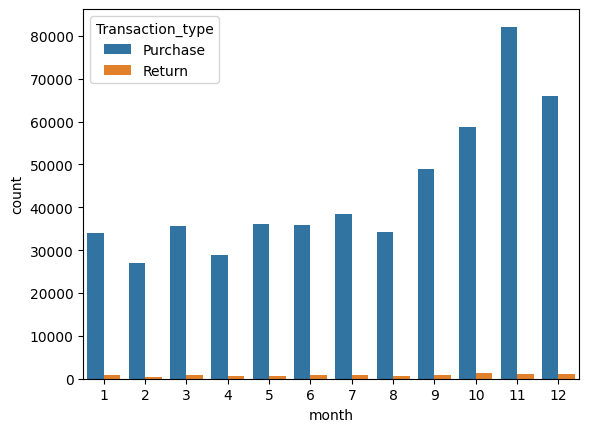

In [ ]:
sns.countplot(x='month',hue="Transaction_type",data=df)

### **Day of Week Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='day', ylabel='count'>

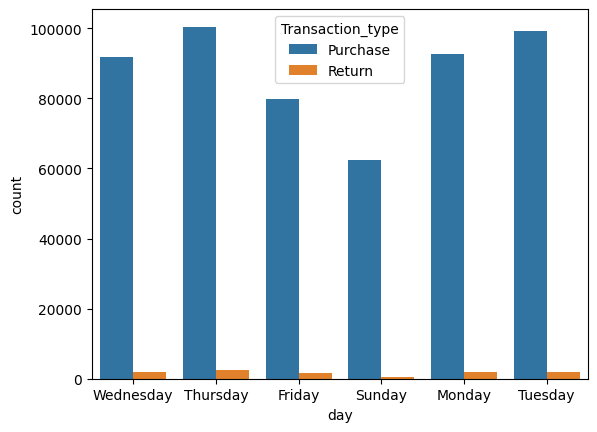

In [ ]:
sns.countplot(x='day',hue="Transaction_type",data=df)

### **Hourly Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Hour', ylabel='count'>

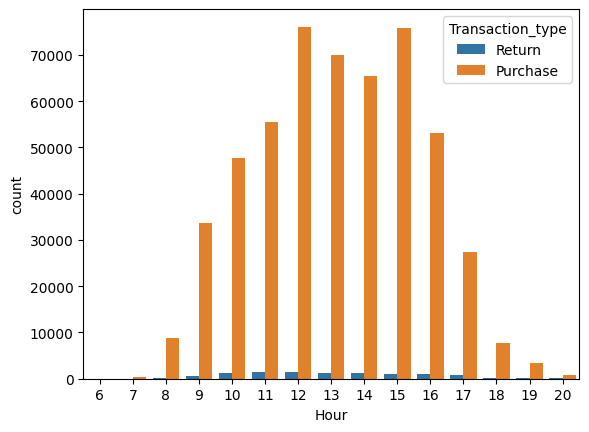

In [ ]:
sns.countplot(x='Hour',hue="Transaction_type",data=df)

### **Country-wise Analysis**

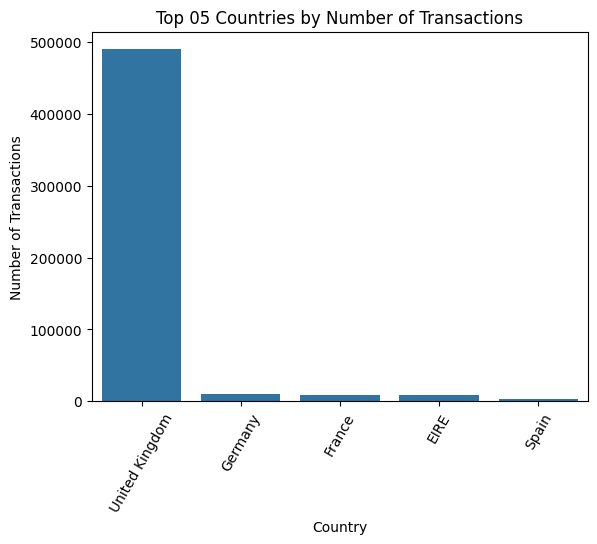

In [ ]:
# Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(5)
#plt.figure(figsize=())
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 05 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=60)
plt.show()

In [ ]:
df.loc[(df['Transaction_type']=="Return")&(df['Transaction_Status']=="Completed")]['UnitPrice'].describe()

,UnitPrice
count,1336.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
df.loc[(df['UnitPrice']==0)&(df['Transaction_Status']=="Completed")&(df['Transaction_type']=="Return")]["Quantity"].abs().sum()/df.loc[(df['UnitPrice']==0)&(df['Transaction_Status']=="Completed")&(df['Transaction_type']=="Purchase")]["Quantity"].abs().sum()

2.8507651831342895

### **INSIGHTS :**


1.   Maximum transactions occur in last quarter of the year (i.e from September to December.)
2.   Maximum transactions occur in Weekdays(specially Tuesday, Wednesday and Thursday and least transactions occur in Weekends (Friday and Sunday). There are no transactions on Saturday.
3.   Maximum transactions occur between 12:00 hrs to 15:00 hrs and least transactions occur before 08:00 hrs and after 18:00 hrs.
4.   Maximum transactions are from United Kingdom and is followed by Germany, France, Eire and Spain.
5.   Customers have returned only Free items.


### **RECOMMENDATIONS :**
1. As sales is least on weekends, it may be due to current promotions might not be effective on weekends or pricing might not be competitive enough for weekend shoppers. Company should offer exclusive discounts or deals specifically for weekend shoppers.
2. As maximum transactions occur between 12:00 hrs to 15:00 hrs, company should confirm that the loading time of website , images , product description and payment time should be less and comfortable for customers especially in United Kingdom , Germany , France , Eire and Spain.
3. Inventory management is crucial to ensure product availability and customer satisfaction and especially from September to December as there is seasonal varaiation in whole year due to various festivals.
4. Free items are returned frequently which means the free items are disliked by customers. In other words , customer satisfaction is very low. Company should think on strategy and quality of return items.

### **Correlation Analysis**

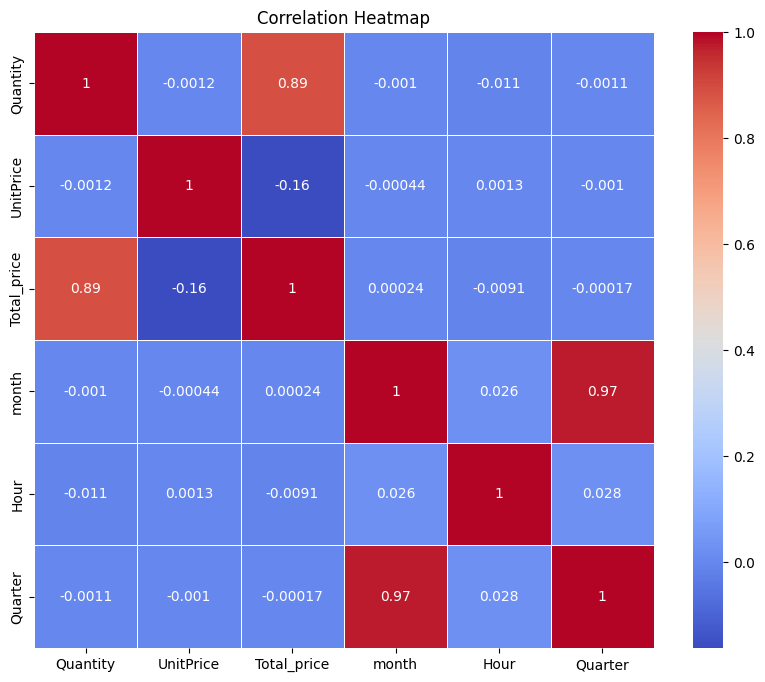

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **CUSTOMER RELATION MANAGEMENT (CRM) ANALYSIS - RFM CUSTOMER SEGMENTATION**

In [ ]:
df2=df.copy()

In [ ]:
df2=df2.loc[(df2['Transaction_Status']=="Completed")]

In [ ]:
# Calculate the most recent date in the dataset and add one day
max_purchase_date = df['InvoiceDate'].max()
cutoff_date = max_purchase_date + datetime.timedelta(days=1)

# Calculate RFM metrics for each customer
RFM = df2.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (cutoff_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Total_price', 'sum')
).reset_index()

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### **Assigning Recency Score, Monetary Score and Frequency Score**

In [ ]:
RFM["RecencyScore"] = pd.qcut(RFM['Recency'],5, labels=[5,4,3,2,1])

In [ ]:
RFM["MonetaryScore"] = pd.qcut(RFM['Monetary'],5, labels=[1,2,3,4,5])

In [ ]:
RFM["FrequencyScore"] = pd.qcut(RFM['Frequency'].rank(method="first"),5, labels=[1,2,3,4,5])

In [ ]:
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore
0,12346.0,326,1,77183.60,1,5,1
1,12347.0,2,7,4310.00,5,5,5
2,12348.0,75,4,1797.24,3,5,5
3,12349.0,19,1,1757.55,5,5,1
4,12350.0,310,1,334.40,1,3,1
5,12352.0,36,8,2506.04,4,5,5
6,12353.0,204,1,89.00,2,2,1
7,12354.0,232,1,1079.40,2,4,1
8,12355.0,214,1,459.40,2,3,1
9,12356.0,23,3,2811.43,5,5,4


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7867 entries, 0 to 7866
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      7867 non-null   object  
 1   Recency         7867 non-null   int64   
 2   Frequency       7867 non-null   int64   
 3   Monetary        7867 non-null   float64 
 4   RecencyScore    7867 non-null   category
 5   MonetaryScore   7867 non-null   category
 6   FrequencyScore  7867 non-null   category
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 269.6+ KB


In [ ]:
RFM['RecencyScore']=RFM['RecencyScore'].astype(int)
RFM['MonetaryScore']=RFM['MonetaryScore'].astype(int)
RFM['FrequencyScore']=RFM['FrequencyScore'].astype(int)

### **Categorizing customers according to RFM Score**

In [ ]:
def category(row):
  if row['RecencyScore']<3:
    if (row['MonetaryScore']<3)&(row['FrequencyScore']<3):
      return "Lost"
    elif (row['MonetaryScore']<5)&(row['FrequencyScore']<5):
      return "Hibernating"
    else :
      return "Can't Lose Them"
  elif row['RecencyScore']<4:
    if (row['MonetaryScore']<3)&(row['FrequencyScore']<3):
      return "About to Sleep"
    elif (row['MonetaryScore']<4)&(row['FrequencyScore']<4):
      return "Needs Attention"
    else :
      return "Loyal Customers"
  elif row['RecencyScore']<5:
    if (row['MonetaryScore']==1)&(row['FrequencyScore']==1):
      return "Promising"
    elif (row['MonetaryScore']<4)&(row['FrequencyScore']<4):
      return "Potential Loyalists"
    else :
      return "Loyal Customers"
  elif row["RecencyScore"]==5:
    if (row['MonetaryScore']==1)&(row['FrequencyScore']==1):
      return "Price Sensitive"
    elif (row['MonetaryScore']<=2)&(row['FrequencyScore']<=2):
      return "Recent Users"
    elif (row['MonetaryScore']<=3)&(row['FrequencyScore']<=3):
      return "Potential Loyalists"
    else :
      return "Champions"

In [ ]:
RFM['Customer_Category']=RFM.apply(category,axis=1)

In [ ]:
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category
0,12346.0,326,1,77183.60,1,5,1,Can't Lose Them
1,12347.0,2,7,4310.00,5,5,5,Champions
2,12348.0,75,4,1797.24,3,5,5,Loyal Customers
3,12349.0,19,1,1757.55,5,5,1,Champions
4,12350.0,310,1,334.40,1,3,1,Hibernating
5,12352.0,36,8,2506.04,4,5,5,Loyal Customers
6,12353.0,204,1,89.00,2,2,1,Lost
7,12354.0,232,1,1079.40,2,4,1,Hibernating
8,12355.0,214,1,459.40,2,3,1,Hibernating
9,12356.0,23,3,2811.43,5,5,4,Champions


In [ ]:
RFM['Customer_Category'].value_counts()

,count
Customer_Category,
Hibernating,1637
Loyal Customers,1607
Champions,1284
Lost,1211
Potential Loyalists,953
Needs Attention,497
About to Sleep,341
Can't Lose Them,295
Recent Users,41


In [ ]:
Segments=RFM['Customer_Category'].value_counts()

In [ ]:
(Segments * 100 /Segments.sum()).reset_index()

,Customer_Category,count
0,Hibernating,20.808440
1,Loyal Customers,20.427101
2,Champions,16.321342
3,Lost,15.393416
4,Potential Loyalists,12.113893
5,Needs Attention,6.317529
6,About to Sleep,4.334562
7,Can't Lose Them,3.749841
8,Recent Users,0.521164
9,Price Sensitive,0.012711


**INSIGHTS :**


1.   There are total 20.8% of Hibernating Customers and is followed by 20.42% of Loyal Customers and 16.32% of Champions Customers.
2.   There are total 15.4% of Lost Customers and 4.3% of "About to Sleep" Customers
2.   There are only 0.01% Price sensitive Customers and 0.52% of Recent Users.




### **RECOMMENDATIONS :**
1. Hibernating customers are those who have stopped making purchases or engaging with your brand for a significant period. Company should offer exclusive discounts or promotions to entice them back. Company can suggest products based on their previous purchases or browsing history.
2. Loyal customers are individuals who consistently purchase products or services from a particular brand over time. Company should implement a tiered loyalty program with rewards and benefits ,  offer exclusive discounts, promotions, or early access to new products or services.
3. Champions customer are invaluable assets to a business as they can significantly impact brand reputation and customer acquisition. They not only purchase your products or services but also actively promote your brand to others. Company should express gratitude for their loyalty and support through personalized messages or gifts. Company should also actively seek their feedback and involve them in product development or improvement processes.
4. Lost customers are those who have stopped making purchases or engaging with your brand for a significant period. Company should offer exclusive discounts or promotions to entice them back. Company should also conduct surveys to gather feedback on their experience and identify reasons for their inactivity.
5. About to Sleep customers are who have not made a purchase in a relatively long time but not to the extent that they are unapproachable.Company should offer time-sensitive discounts or promotions to create a sense of urgency. Also company should address any questions or concerns they may have. Company should have main focus on to increase the likelihood of customers completing their purchases and reducing cart abandonment.
6. Company should suggest products or services based on the Recent User's age, gender, location, or other demographic factors as purchase history will not be available.

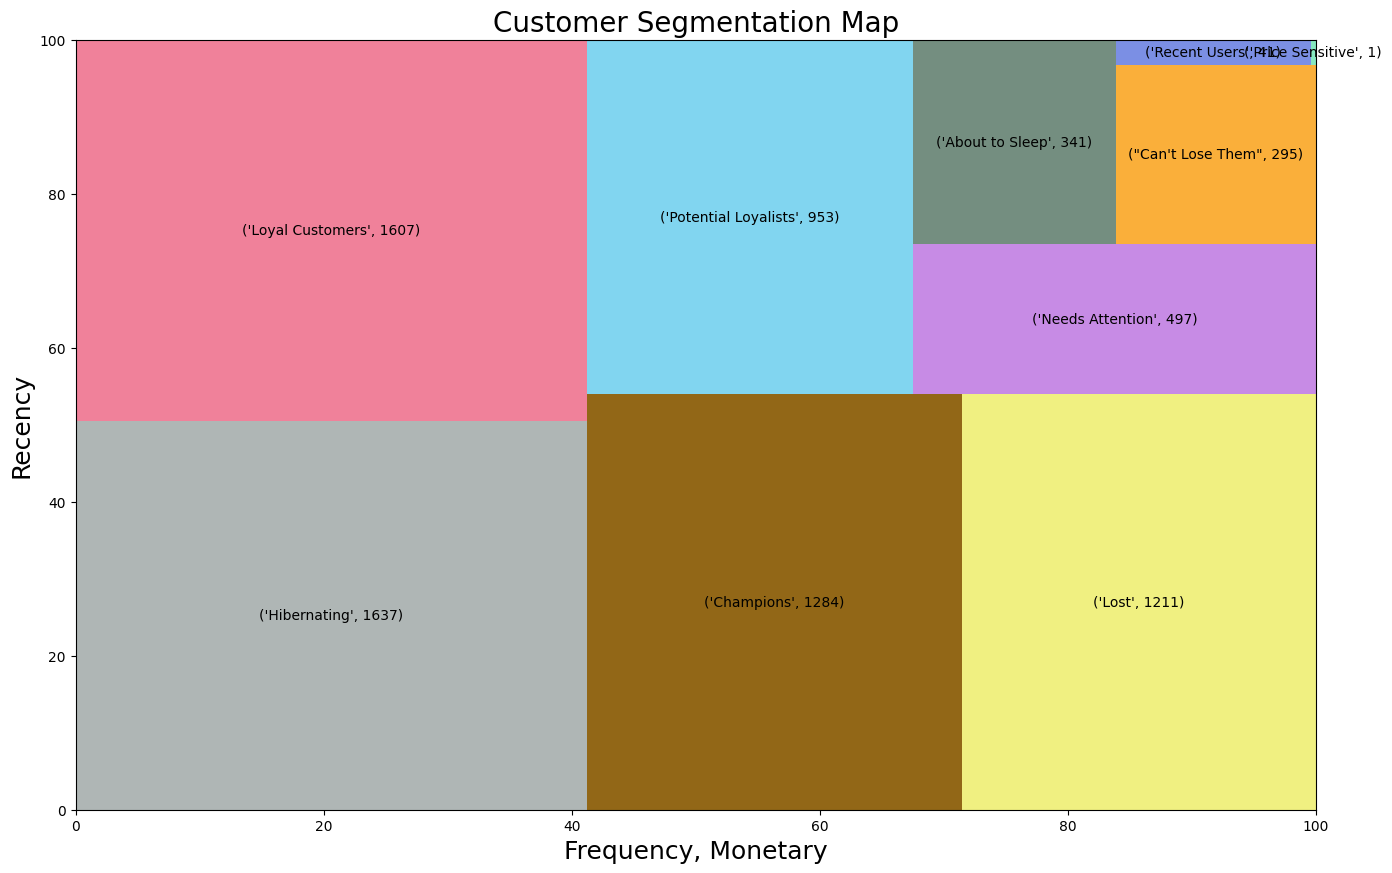

In [ ]:
fig=plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
  sizes=Segments,
  label=[(i,j) for (i,j) in zip(Segments.index,Segments.values)],
  color=[
    "#AFB6B5",
    "#F0819A",
    "#926717",
    "#F0F081",
    "#81D5F0",
    "#C78BE5",
    "#748E80",
    "#FAAF3A",
    "#7B8FE4",
    "#86E8C0",
],
pad=False,
bar_kwargs={"alpha": 1},
text_kwargs={"fontsize":10},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency, Monetary", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

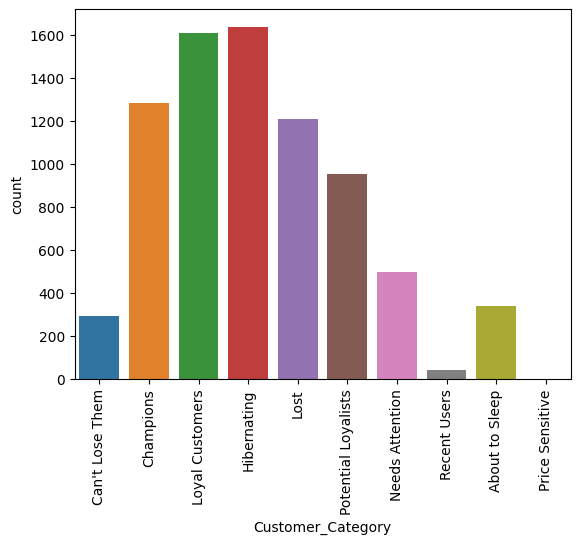

In [ ]:
sns.countplot(x='Customer_Category',hue="Customer_Category",data=RFM)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df3=pd.merge(df2,RFM,on="CustomerID")
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,day,Hour,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them


### **Top 5 Product - Customer Segment Wise**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

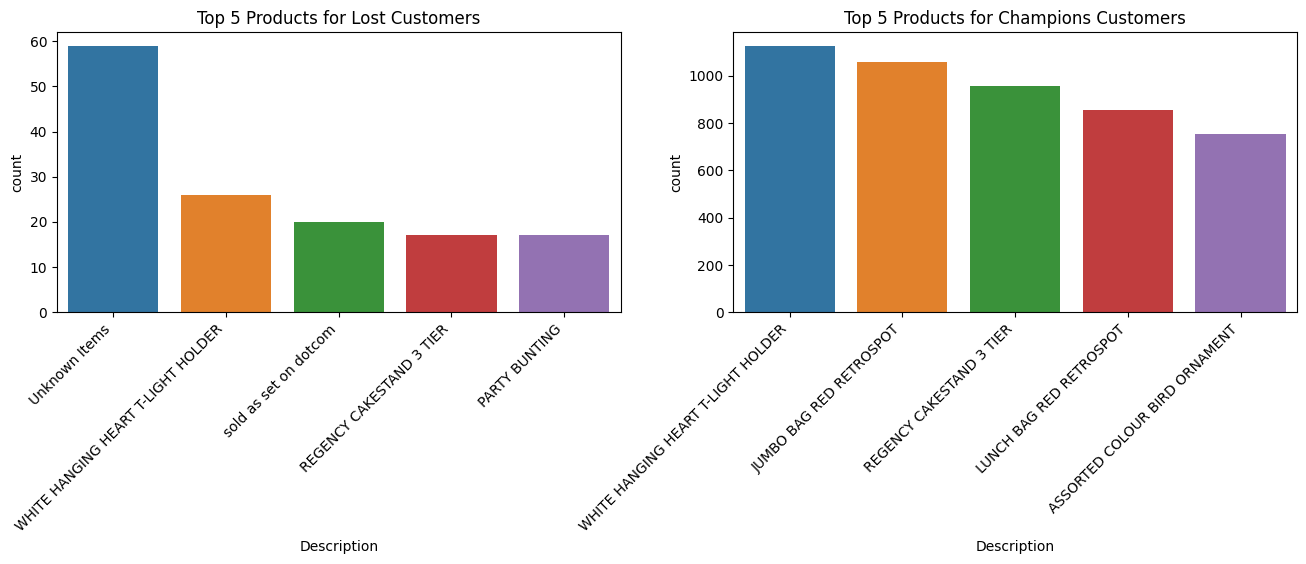

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Lost"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,ha='right')
plt.title("Top 5 Products for Lost Customers")

plt.subplot(2,2,2)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Champions"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,ha='right')
plt.title("Top 5 Products for Champions Customers")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

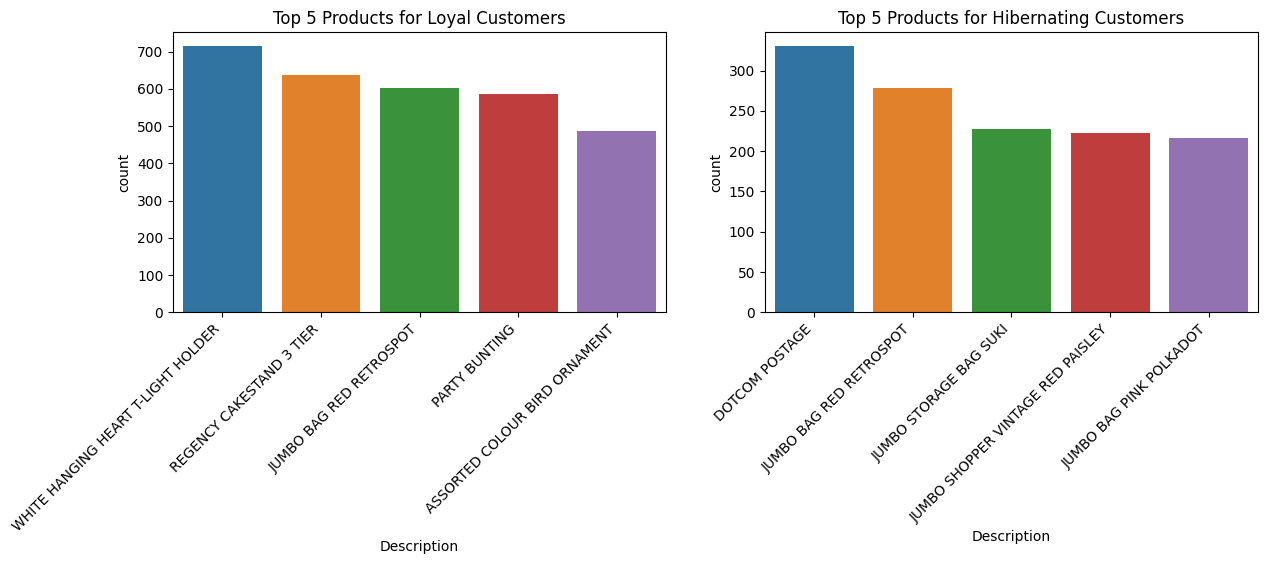

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Loyal Customers"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,ha='right')
plt.title("Top 5 Products for Loyal Customers")

plt.subplot(2,2,2)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Hibernating"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,ha='right')
plt.title("Top 5 Products for Hibernating Customers")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

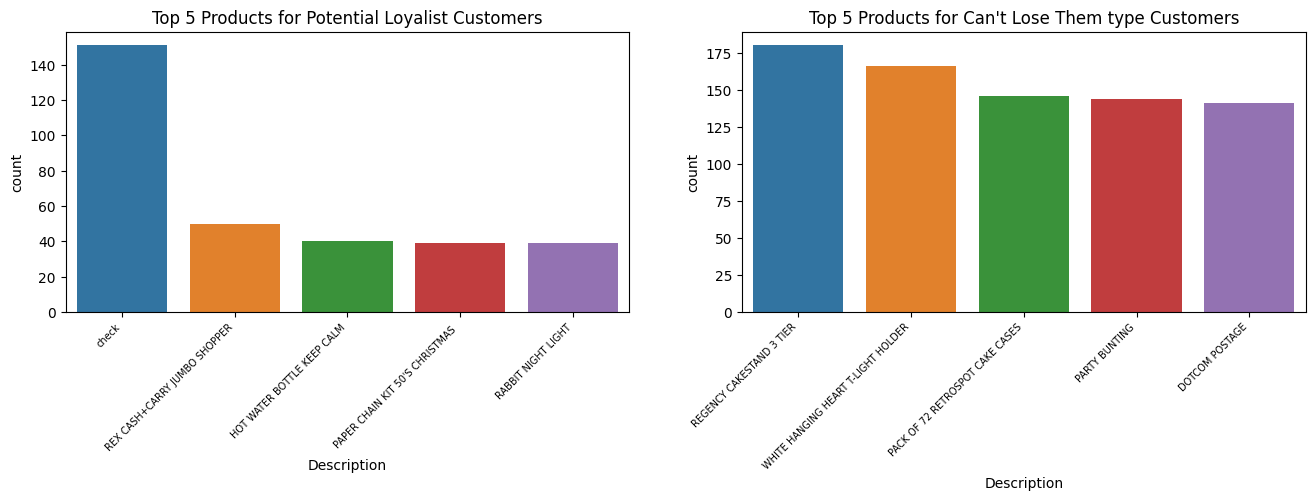

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Potential Loyalists"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,fontsize=7,ha='right')
plt.title("Top 5 Products for Potential Loyalist Customers")

plt.subplot(2,2,2)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Can't Lose Them"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,fontsize=7,ha='right')
plt.title("Top 5 Products for Can't Lose Them type Customers")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

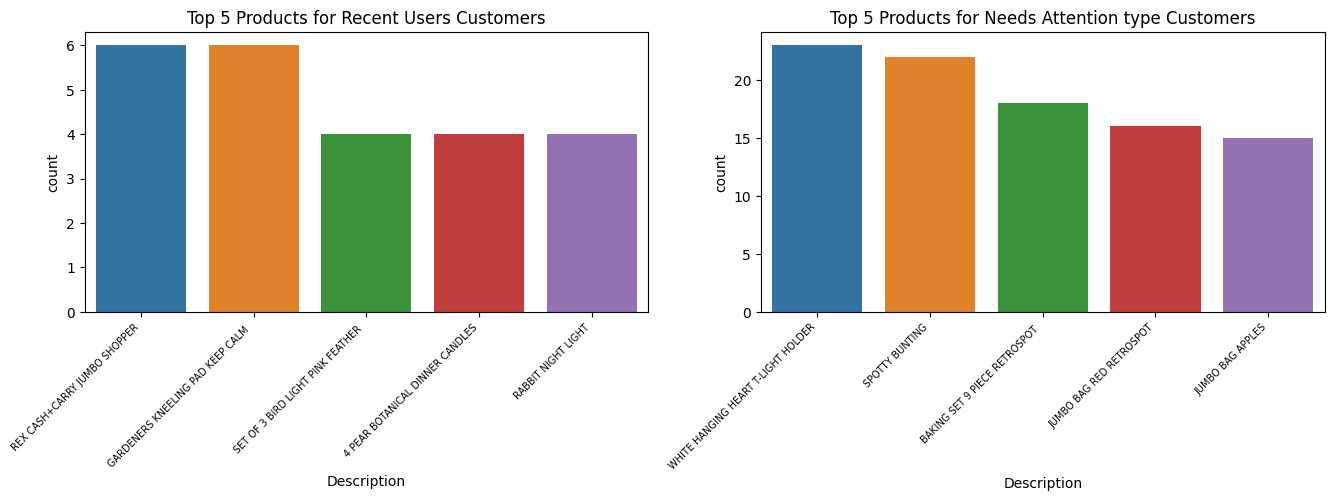

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Recent Users"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,fontsize=7,ha='right')
plt.title("Top 5 Products for Recent Users Customers")

plt.subplot(2,2,2)
sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="Needs Attention"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,fontsize=7,ha='right')
plt.title("Top 5 Products for Needs Attention type Customers")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

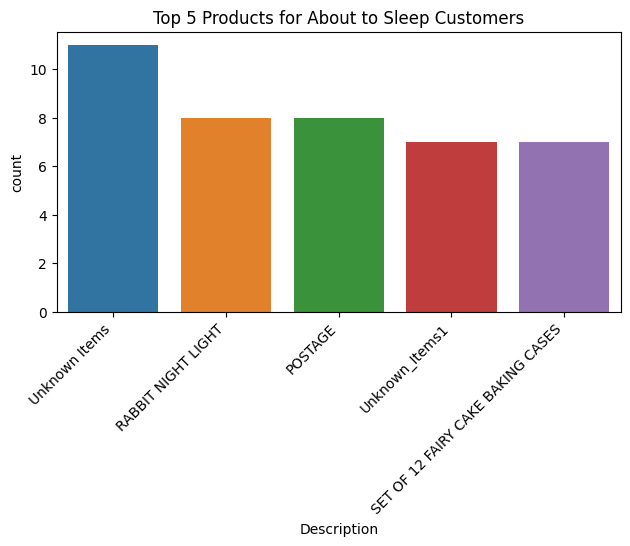

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)

sns.barplot(x="Description",y="count",data=df3[df3['Customer_Category']=="About to Sleep"]['Description'].value_counts().reset_index().head(5),hue="Description")
plt.xticks(rotation=45,ha='right')
plt.title("Top 5 Products for About to Sleep Customers")

plt.show()

In [ ]:
#damaged=df3.loc[(df3['Customer_Category']=="Lost") | (df3['Customer_Category']=="About to Sleep")]['Description'].value_counts().reset_index()

In [ ]:
damaged=df3.loc[df3['Description'].str.contains("damaged") | df3['Description'].str.contains("Damaged") | df3['Description'].str.contains("DAMAGED")]

In [ ]:
damaged=damaged.loc[damaged['Transaction_Status']=="Completed"]

In [ ]:
unk=df3.loc[df3['Description'].str.contains("Unknown") | df3['Description'].str.contains("unknown") | df3['Description'].str.contains("UNKNOWN")]

In [ ]:
damaged.shape

(66, 23)

In [ ]:
unk=unk.loc[unk['Transaction_Status']=="Completed"]

In [ ]:
unk.shape

(159, 23)

In [ ]:
damaged.loc[damaged['Customer_Category']=="Lost"].groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Return,-8956


In [ ]:
damaged.loc[damaged['Customer_Category']=="About to Sleep"].groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Return,-230


In [ ]:
damaged.groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Purchase,192
Return,-11005


In [ ]:
print("Percentage of damaged products returned by Lost and About to Sleep Customers is :",round(((8956 +230)*100/11005),2),"%")

Percentage of damaged products returned by Lost and About to Sleep Customers is : 83.47 %


In [ ]:
unk.loc[unk['Customer_Category']=="Lost"].groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Purchase,4786
Return,-2763


In [ ]:
unk.loc[unk['Customer_Category']=="About to Sleep"].groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Purchase,142
Return,-1774


In [ ]:
unk.groupby("Transaction_type")['Quantity'].sum()

,Quantity
Transaction_type,
Purchase,8213
Return,-10515


In [ ]:
(4786 + 142)*100/8213 , (2763+1774)*100/10515

(60.002435163764765, 43.147883975273416)

### **INSIGHTS :**


1.   Lost Customers has mostly bought whose descriptions are not available and is followed by "White Hanging Heart T-Light Holder", “sold as set of dotcom” , "Regency Cakestand 3 Tier" and "Party Bunting"
2.   Champions and Loyal  Customers have bought mostly "White Hanging Heart T-Light Holder", "Jumbo Bag Red Retrospot" , "Regency Cakestand 3 Tier" , "Lunch Bag Red Retrospot" and "Assorted Colour Bird Ornament"
3.   Hibernating Customers have mostly bought "Dotcom Postage", "Jumbo Bag Red Retrospot", "Jumbo Storage Bag Suki", "Jumbo Shopper Vintage Red Paisley" and  "Jumbo Bag Pink Polkadot",
4.  Potential Loyalist Customers have mostly bought "Check", “Rex Cash + Carry Jumbo Shopper”, “Hot Water Bottle Keep Calm”, “Paper Chain Kit 50’s Christmas” and “Rabit Night Light”
5.  Can't Lose Them Customers have mostly bought "Regency Cakestand 3 Tier", "White Hanging Heart T-Light Holder" , "Pack of 72 Retrospot Cake Cases", "Party Bunting" and “Dotcom Postage”
6.  Recent Users Customers have mostly bought “Rex Cash + Carry Jumbo Shopper”, “Garderners Kneeling Pad Keep Calm”, “Set  of 3 bird Light Pink Feather”, “4 Pear Botanical Dinner Candles” and “Rabit Night Light”.
7.  Need Attention type Customer have mostly bought "White Hanging Heart T-Light Holder", "Spotty Bunting", “Banking Set 9 Piece Retrospot”, "Jumbo Bag Red Retrospot" and Jumbo Bag Apples”
8.  About to sleep mostly bought Items with no description , “Rabbit Night Light’, “Postage” and “Set of 12 Fairy Cake  Baking Cases”
9.  Overall , Light , Cake items , Bag and Retrospot are the most purchased items.
10.  About 83.47% of Damaged Items were returned by Lost and About to Sleep Customers.
11. About 60% of Unknown Items were purchased by Lost and About to Sleep Customers. About 43.14% of Unknown Items were returned by Lost and About to Sleep Customers.

### **RECOMMENDATIONS :**
1. Company should combine purchased products (Light , Cake items, Bag , Retrospot )with related items to encourage larger purchases and can offer discount to attract customers to this combinations.
2. Company should pay special attention on "damaged" products, though it is a free item. Company should also verify that the returned items were the products sold by same company. If it is true, it can be the reason for Lost Customers.
3. There were 10515 items with no descriptions. Company should improve their data collecting methods. Out of total missing descriptions items, 60% items were purchased by Lost and About to sleep customers.

### **Transaction_status and Transaction_types for Customer Segmentation**

In [ ]:
pd.crosstab(df3['Customer_Category'],[df3['Transaction_Status'],df3['Transaction_type']],normalize='columns',margins=True)

Transaction_Status  Completed                 All
Transaction_type     Purchase    Return          
Customer_Category                                
About to Sleep       0.002217  0.095808  0.002454
Can't Lose Them      0.103227  0.000000  0.102966
Champions            0.474275  0.000000  0.473073
Hibernating          0.086837  0.207335  0.087142
Lost                 0.006942  0.378743  0.007884
Loyal Customers      0.298213  0.000000  0.297457
Needs Attention      0.008777  0.110778  0.009035
Potential Loyalists  0.018356  0.207335  0.018834
Price Sensitive      0.000002  0.000000  0.000002
Recent Users         0.001156  0.000000  0.001153

### **INSIGHTS :**


1.   Purchase rate of Champions and Loyal Customer are higher 47% and 29.8% respectively while their return-completed transaction rate are nill respectively.
2.   Purchase rate of "Can't lose them" customers are 10% and return rate is 0%.
3.   Lost customers have highest return rate of 37.8 % and is followed by and Hibernating , Potential Loyalist Customers  with return rate 20.7% respectively.




### **Purchased and Return Items :**

In [ ]:
df.loc[(df['Transaction_Status']=='Completed')].groupby("Description")['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
JUMBO BAG RED RETROSPOT,48375
WHITE HANGING HEART T-LIGHT HOLDER,37876
POPCORN HOLDER,36749
PACK OF 72 RETROSPOT CAKE CASES,36396
ASSORTED COLOUR BIRD ORNAMENT,36362
RABBIT NIGHT LIGHT,31071


In [ ]:
df.loc[(df['Transaction_Status']=='Completed')].groupby(["Description"])['Quantity'].sum().sort_values().head(10)

,Quantity
Description,
printing smudges/thrown away,-19200
"Unsaleable, destroyed.",-15644
check,-12030
Printing smudges/thrown away,-9058
Damaged,-7540
throw away,-5368
damages,-4338
incorrect stock entry.,-4320
wrongly marked. 23343 in box,-3100


### **INSIGHTS :**
1. "PAPER CRAFT , LITTLE BIRDIE", "MEDIUM CERAMIC TOP STORAGE JAR" , "WORLD WAR 2 GLIDERS ASSTD DESIGNS	"	were among the most purchased items successfully.
2.  Returned product mostly includes destroyed items , damaged items , incorrect items , etc.

### **RECOMMENDTIONS :**
1. Company should strictly focus on returned products as it inclues many damages , incorrect items , and wrong stock entry`

### **Purchase - Return Rate**

In [ ]:
Completed = df.loc[df['Transaction_Status']=="Completed"]

In [ ]:
Completed['Quarter']=df['InvoiceDate'].dt.quarter

<ipython-input-407-c3cdab96b9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Completed['Quarter']=df['InvoiceDate'].dt.quarter


In [ ]:
pd.crosstab(Completed['Quarter'],[Completed['Transaction_Status'],Completed['Transaction_type']],normalize="columns",margins=True)

Transaction_Status Completed                 All
Transaction_type    Purchase    Return          
Quarter                                         
1                   0.183772  0.208084  0.183834
2                   0.191604  0.306886  0.191896
3                   0.231488  0.198353  0.231404
4                   0.393136  0.286677  0.392867

### **INSIGHTS :**
1. There is gradually  increase in purchase transactions in every quarter of  year.
2. Return transactions are much higher in Quarter 2 and is followed by Quarter 4


In [ ]:
df4=df3.copy()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527390 entries, 0 to 527389
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           527390 non-null  object        
 1   StockCode           527390 non-null  object        
 2   Description         527390 non-null  object        
 3   Quantity            527390 non-null  int64         
 4   InvoiceDate         527390 non-null  datetime64[ns]
 5   UnitPrice           527390 non-null  float64       
 6   CustomerID          527390 non-null  object        
 7   Country             527390 non-null  object        
 8   Transaction_Status  527390 non-null  object        
 9   Transaction_type    527390 non-null  object        
 10  Total_price         527390 non-null  float64       
 11  date                527390 non-null  object        
 12  month               527390 non-null  int32         
 13  day                 527390 no

In [ ]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,day,Hour,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,Wednesday,8,4,372,34,5391.21,1,5,5,Can't Lose Them


### **Average Days Bewteen Purchases**

In [ ]:
df4=df4.sort_values(by='InvoiceDate')

In [ ]:
df4=df4.loc[df4['Transaction_Status']=='Completed']

In [ ]:
df4['days_between'] = df4.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average days between purchases per customer
avg_days = df4.groupby('CustomerID')['days_between'].mean().reset_index()

In [ ]:
df4=pd.merge(df4,avg_days,on="CustomerID",how="left")

In [ ]:
df4.drop("days_between_x",axis=1,inplace=True)
df4.rename(columns={"days_between_y":"Avg_days"},inplace=True)

In [ ]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Hour,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0


In [ ]:
avg_days.loc[avg_days['days_between']>=30].shape

(54, 2)

In [ ]:
avg_days.loc[avg_days['days_between']>=90].shape

(15, 2)

In [ ]:
avg_days.loc[avg_days['days_between']>=180].shape

(4, 2)

In [ ]:
(avg_days['days_between']).describe()

,days_between
count,5476.000000
mean,2.546741
std,9.692284
min,0.000000
25%,0.000000
50%,0.147997
75%,2.298698
max,309.000000


### **INSIGHTS :**
1. Average of all customer's average days between purchases is 2.5 days.
2. There are total 54 customers whose average days between purchases is 1 month or more.
3. There are total 15 customers whose average days between purchases is 3 month or more.
4. There are total 4 customers whose average days between purchases is 6 month or more.

### **RECOMMENDATIONS :**
1. Company should use this data for timing recommendations (e.g : Can send a reminder or offer a discount just before their expected purchase date.)
2. Company should forecast demand for products and optimize inventory levels.

## **Cancellation Rate**

In [ ]:
Cancellation_rate=(df.loc[df['Transaction_Status']=="Cancelled"].groupby("Country")['InvoiceNo'].nunique()/df.groupby("Country")['InvoiceNo'].nunique()).round(2)*100

In [ ]:
Cancellation_rate=pd.DataFrame(Cancellation_rate)
Cancellation_rate.rename(columns={"InvoiceNo":"Cancellation_rate"},inplace=True)

In [ ]:
Cancellation_rate['Number_of_Orders']=df.groupby("Country")['InvoiceNo'].nunique()

In [ ]:
Cancellation_rate.reset_index(inplace=True)

In [ ]:
Cancellation_rate.sort_values(by="Cancellation_rate",ascending=False).head(10)

,Country,Cancellation_rate,Number_of_Orders
8,Czech Republic,60.0,5
29,Saudi Arabia,50.0,2
23,Malta,50.0,10
20,Japan,32.0,28
19,Italy,31.0,55
30,Singapore,30.0,10
34,USA,29.0,7
33,Switzerland,27.0,74
16,Hong Kong,27.0,15
2,Bahrain,25.0,4


In [ ]:
Cancellation_rate.loc[Cancellation_rate['Number_of_Orders']>50].sort_values(by="Cancellation_rate",ascending=False).head(10)

,Country,Cancellation_rate,Number_of_Orders
19,Italy,31.0,55
33,Switzerland,27.0,74
14,Germany,24.0,603
10,EIRE,20.0,360
3,Belgium,18.0,119
27,Portugal,18.0,71
0,Australia,17.0,69
13,France,15.0,461
31,Spain,14.0,105
36,United Kingdom,14.0,23494


In [ ]:
df.loc[df['Transaction_Status']=="Cancelled"].groupby("Country")['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

,InvoiceNo
Country,
United Kingdom,3372
Germany,146
EIRE,72
France,69
Belgium,21
Switzerland,20
Italy,17
Spain,15
Portugal,13


In [ ]:
no=(df.loc[(df['Country']=='United Kingdom')&(df['Transaction_Status']=="Cancelled")]['InvoiceNo'].nunique() * 100/df.loc[(df['Country']=='United Kingdom')]['InvoiceNo'].nunique())

In [ ]:
print("There were total",round(no,2), "% of cancelled transactions for United Kingdom")

There were total 14.35 % of cancelled transactions for United Kingdom


### **INSIGHTS :**
1. Cancellation rate were high in Czech Republic - 60%, Saudi Arabia - 50% and Malta-50%. But these country have very small number of orders.
2. Considering atleast 50 orders, Italy - 31% , Switzerland - 27% and Germany 24% of cancellation rate.
3. United Kingdom has highest number of Cancelled transactions i.e 3372 (14.35%)

### **RECOMMENDATIONS :**
1. Company should conduct surveys to gather feedback on why customers are canceling their orders.

## **Repeat Customer Rate**

In [ ]:
# Group by customer and count purchases
customer_purchase_counts = df4.loc[(df4['Transaction_Status']=="Completed")&(df4['Transaction_type']=="Purchase")].groupby(['CustomerID'])['InvoiceDate'].nunique()

# Calculate repeat customers
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()

# Calculate total customers
total_customers = df4['CustomerID'].nunique()

# Calculate repeat purchase rate
repeat_purchase_rate = (repeat_customers / total_customers).round(2)*100

print("Repeat Purchase Rate:", repeat_purchase_rate," %")

Repeat Purchase Rate: 36.0  %


In [ ]:
number=pd.DataFrame(df4.loc[(df4['Transaction_Status']=="Completed")&(df4['Transaction_type']=="Purchase")].groupby(['Country','CustomerID'])['InvoiceNo'].nunique().reset_index())

In [ ]:
#number['repeat_customer_country']=number[number['InvoiceNo']>1].count()
#number['total_customers_country']=number.groupby("Country")['CustomerID'].nunique()

In [ ]:
number=(number.loc[number['InvoiceNo']>1].groupby("Country")['CustomerID'].nunique() * 100 / (number.groupby("Country")['CustomerID'].nunique())).round(2).reset_index()

In [ ]:
number.rename(columns={"CustomerID":"Repeat_customer_rate"},inplace=True)

In [ ]:
number.sort_values(by="Repeat_customer_rate",ascending=False).head(10)

,Country,Repeat_customer_rate
0,Australia,100.00
11,European Community,100.00
22,Lithuania,100.00
30,Singapore,100.00
17,Iceland,100.00
8,Czech Republic,100.00
14,Germany,72.34
3,Belgium,72.00
26,Poland,66.67
9,Denmark,66.67


In [ ]:
number.loc[number['Repeat_customer_rate']>=50].shape

(23, 2)

In [ ]:
number.sort_values(by="Repeat_customer_rate").head()

,Country,Repeat_customer_rate
10,EIRE,9.68
34,USA,25.00
5,Canada,25.00
15,Greece,25.00
18,Israel,33.33


### **INSIGHTS :**
1. Overall, there were Repeat purchase rate of 36.0%
2. There were 6 countries with Repeat purchase rate of 100 % - Australia, European Community, Lithuania, Singapore, Iceland, Czech Republic.
3. There were around 23 countries with Repeat purchase rate of 50% and above.
4. In Eire, Repeat purchase rate is 9.68 which is the least among all countries.

### **RECOMMENDATIONS :**
Company should gather feedback from customers to identify areas for improvement.
Company should also monitor online reviews and social media comments to understand customer sentiment.

## **Average Order Value (AOV)**

In [ ]:
average_order_value = df.loc[df['Transaction_Status']=="Completed"].groupby('InvoiceNo')['Total_price'].mean().round(2)

In [ ]:
average_order_value=average_order_value.rename("AOV",inplace=True).sort_values(ascending=False).reset_index()

In [ ]:
print("Overall Average of Average Order Value is ",average_order_value['AOV'].mean().round(2))

Overall Average of Average Order Value is  57.44


In [ ]:
#average_order_value=average_order_value.rename("AOV",inplace=True).sort_values(ascending=False).reset_index()

In [ ]:
average_order_value.head(10)

,InvoiceNo,AOV
0,581483,168469.60
1,541431,77183.60
2,556444,38970.00
3,537632,13541.33
4,A563185,11062.06
5,551697,8142.75
6,540815,5053.63
7,573003,4992.00
8,550461,4307.18
9,560373,4287.63


In [ ]:
df6=pd.merge(df4,average_order_value,on="InvoiceNo",how="left")

In [ ]:
df6.loc[df6['Transaction_Status']=="Completed"].groupby("Country")['AOV'].mean().sort_values(ascending=False).head(5)

,AOV
Country,
Netherlands,120.797706
Australia,116.936199
Japan,116.559969
Singapore,95.852207
Sweden,85.262178


In [ ]:
df6.loc[df6['Transaction_Status']=="Completed"].groupby("Country")['AOV'].mean().sort_values().head(5)

,AOV
Country,
Unspecified,10.724615
Saudi Arabia,16.210000
RSA,17.280000
United Kingdom,18.611447
USA,20.003017


In [ ]:
df6.loc[df6['Transaction_Status']=="Completed"].groupby("CustomerID")['AOV'].mean().sort_values(ascending=False).head(5)

,AOV
CustomerID,
12346.0,77183.60
16446.0,56157.50
Unknown_ID_107,13541.33
15098.0,13305.50
Unknown_ID_2498,11062.06


In [ ]:
df6.loc[df6['Transaction_Status']=="Completed"].groupby("Description")['AOV'].mean().sort_values(ascending=False).head(5)

,AOV
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600000
PICNIC BASKET WICKER 60 PIECES,19809.750000
AMAZON FEE,6880.545000
TEA TIME TEA TOWELS,2741.976667
VINTAGE POST OFFICE CABINET,894.055000


In [ ]:
df.loc[(df['Description']=="PAPER CRAFT , LITTLE BIRDIE")&(df['Transaction_Status']=="Completed")][['Transaction_type']].value_counts()

,count
Transaction_type,
Purchase,1


In [ ]:
df.loc[(df['Description']=="PICNIC BASKET WICKER 60 PIECES")&(df['Transaction_Status']=="Completed")][['Transaction_type']].value_counts()

,count
Transaction_type,
Purchase,2


In [ ]:
df.loc[(df['Description']=="AMAZON FEE")&(df['Transaction_Status']=="Completed")][['Transaction_type']].value_counts()

,count
Transaction_type,
Purchase,2


In [ ]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Hour,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,8,4,372,34,5391.21,1,5,5,Can't Lose Them,0.0


In [ ]:
df5=df4.loc[(df4['Transaction_Status']=="Completed")&(df4['Transaction_type']=="Purchase")]

In [ ]:
df5=pd.merge(df5,average_order_value,on="InvoiceNo",how="left")

In [ ]:
df5.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,11.10
9,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,Completed,Purchase,...,4,32,10,3237.54,4,5,5,Loyal Customers,1.988304,17.51


In [ ]:
df5=df5.loc[df5['AOV']>=0]

In [ ]:
df5.groupby("Customer_Category")['AOV'].mean().sort_values(ascending=False)

,AOV
Customer_Category,
Champions,23.722300
Loyal Customers,18.995286
Can't Lose Them,17.536959
Needs Attention,14.544618
Hibernating,12.705432
Potential Loyalists,10.150518
About to Sleep,8.693471
Lost,8.544028
Recent Users,7.312451


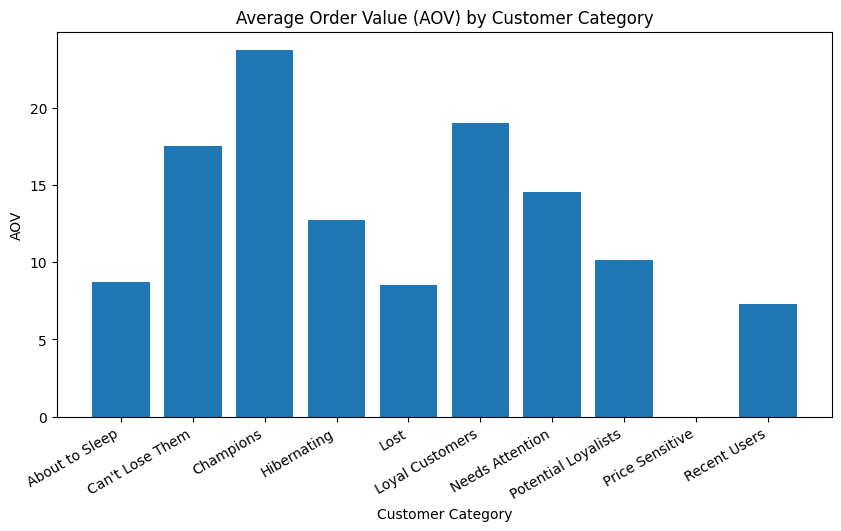

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=df5.groupby("Customer_Category")['AOV'].mean().index,height=df5.groupby("Customer_Category")['AOV'].mean().values)
plt.title("Average Order Value (AOV) by Customer Category")
plt.xlabel("Customer Category")
plt.xticks(rotation=30,ha='right')
#plt.annotate()
plt.ylabel("AOV")
plt.show()

### **INSIGHTS :**
1. Overall, average of  AOV is 57.44
2. Customer (ID-12346.0) has highest Average Order Value of 77183.6 and  is followed by Customer (ID-16446.0) with Average Order Value of 56157.5
3. Country Netherland has highest Average Order Value of 120.8 and is followed by Japan and Australia with Average Order Value of 116.6  each.
4. Country Unspecified has least Average Order Value of 10.7 and is followed by Saudi Arabia and RSA with Average Order Value of 16.2 and 17.2
5. Product "PAPER CRAFT , LITTLE BIRDIE" has highest Average Order Value of 561757.5 and is followed by "PICNIC BASKET WICKER 60 PIECES" and "Amazon Fee" with Average Order Value of 13305.5 and 6880.5. But they have been purchased 1 or 2 times
6. Champions Customer have highest AOV of 23.72 and is followed by Loyal Customers with 19. Recent users have 7.3 Average Order Value and Lost Customer have 8.5 AOV.

### **RECOMMENDATIONS :**
1. Company should suggest related or complementary products to increase the order value.
2. Company should also create packages of products at a discounted price to encourage larger purchases.
3. Company should make recommendations and advertisment for higher Average Order Value Products.


### **MOST PURCHASED ITEMS**

In [ ]:
light = df5.loc[df5['Description'].str.contains("LIGHT")  | df5['Description'].str.contains("light") | df5['Description'].str.contains("Light")]

In [ ]:
light.loc[(light['Transaction_Status']=="Completed")].groupby("Description")['UnitPrice'].mean().sort_values(ascending=False).head(10)

,UnitPrice
Description,
SUNJAR LED NIGHT NIGHT LIGHT,16.130000
CHRISTMAS LIGHTS 10 REINDEER,9.962894
15CM CHRISTMAS GLASS BALL 20 LIGHTS,9.306958
SET 10 LIGHTS NIGHT OWL,9.038333
TOADSTOOL BEDSIDE LIGHT,8.950000
SET 10 NIGHT OWL LIGHTS,8.948605
TOADSTOOL BEDSIDE LIGHT,8.936792
CHRISTMAS LIGHTS 10 SANTAS,8.337647
BABUSHKA LIGHTS STRING OF 10,8.304118


In [ ]:
light.loc[(light['Description']=="SUNJAR LED NIGHT NIGHT LIGHT")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
20237,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,Unknown_ID_155,United Kingdom,Completed,Purchase,...,4,365,1,7268.65,1,5,2,Can't Lose Them,0.0,11.15
37944,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,Unknown_ID_265,United Kingdom,Completed,Purchase,...,4,354,1,2104.00,1,5,3,Can't Lose Them,0.0,8.59


In [ ]:
cake = df5.loc[df5['Description'].str.contains("CAKE")  | df5['Description'].str.contains("cake") | df5['Description'].str.contains("Cake")]

In [ ]:
cake.loc[(cake['Transaction_Status']=="Completed")].groupby("Description")['UnitPrice'].mean().sort_values(ascending=False).head(10)

,UnitPrice
Description,
3 TIER CAKE TIN GREEN AND CREAM,18.599109
3 TIER CAKE TIN RED AND CREAM,17.169941
REGENCY CAKESTAND 3 TIER,13.970015
RED RETROSPOT CAKE STAND,12.607560
RED RETROSPOT ROUND CAKE TINS,12.575698
CAKE STAND 3 TIER MAGIC GARDEN,12.525000
SWEETHEART 3 TIER CAKE STAND,12.072264
NOVELTY BISCUITS CAKE STAND 3 TIER,11.292349
SWEETHEART CAKESTAND 3 TIER,11.184244


In [ ]:
cake.loc[(cake['Description']=="3 TIER CAKE TIN GREEN AND CREAM")].sort_values(by="Quantity",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
171581,552038,22839,3 TIER CAKE TIN GREEN AND CREAM,36,2011-05-06 08:08:00,12.75,14156.0,EIRE,Completed,Purchase,...,2,10,55,117210.08,5,5,5,Champions,0.244620,193.46
343800,567852,22839,3 TIER CAKE TIN GREEN AND CREAM,36,2011-09-22 13:21:00,9.98,18102.0,United Kingdom,Completed,Purchase,...,3,1,60,259657.30,5,5,5,Champions,0.823256,316.72
104921,545475,22839,3 TIER CAKE TIN GREEN AND CREAM,32,2011-03-03 10:59:00,12.75,12415.0,Australia,Completed,Purchase,...,1,24,21,124914.53,4,5,5,Loyal Customers,0.423776,203.99
88217,544075,22839,3 TIER CAKE TIN GREEN AND CREAM,16,2011-02-15 14:50:00,12.75,14156.0,EIRE,Completed,Purchase,...,1,10,55,117210.08,5,5,5,Champions,0.244620,152.45
112691,546212,22839,3 TIER CAKE TIN GREEN AND CREAM,16,2011-03-10 11:33:00,12.75,14156.0,EIRE,Completed,Purchase,...,1,10,55,117210.08,5,5,5,Champions,0.244620,129.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212050,556051,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-06-08 13:09:00,14.95,13742.0,United Kingdom,Completed,Purchase,...,2,17,12,3107.87,5,5,5,Champions,0.955128,11.25
60820,541508,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-01-18 16:06:00,29.17,Unknown_ID_429,United Kingdom,Completed,Purchase,...,1,325,1,615.18,1,4,3,Hibernating,0.000000,11.39
219518,556781,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-06-14 12:47:00,14.95,13384.0,United Kingdom,Completed,Purchase,...,2,31,7,4151.93,4,5,5,Loyal Customers,0.960265,21.71
219920,556812,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-06-14 17:25:00,29.13,Unknown_ID_1921,United Kingdom,Completed,Purchase,...,2,178,1,3393.04,2,5,2,Can't Lose Them,0.000000,11.50


In [ ]:
retrospot = df5.loc[df5['Description'].str.contains("RETROSPOT")  | df5['Description'].str.contains("retrospot") | df5['Description'].str.contains("Retrospot")]

In [ ]:
retrospot.loc[(retrospot['Transaction_Status']=="Completed")].groupby("Description")['UnitPrice'].mean().sort_values(ascending=False).head(10)

,UnitPrice
Description,
CABIN BAG VINTAGE RETROSPOT,22.484118
SEWING BOX RETROSPOT DESIGN,13.275465
RED RETROSPOT CAKE STAND,12.607560
RED RETROSPOT ROUND CAKE TINS,12.575698
RETROSPOT LAMP,11.440897
COOKING SET RETROSPOT,10.612857
DOORMAT RED RETROSPOT,8.940702
RED RETROSPOT TRADITIONAL TEAPOT,8.467329
RED RETROSPOT MINI CASES,8.121839


In [ ]:
retrospot.loc[(retrospot['Description']=="CABIN BAG VINTAGE RETROSPOT")].sort_values(by="UnitPrice",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
197134,554512,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-05-24 15:54:00,58.29,Unknown_ID_1737,United Kingdom,Completed,Purchase,...,2,199,1,1281.03,2,4,2,Hibernating,0.000000,8.11
228777,557644,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-06-21 17:06:00,58.29,Unknown_ID_2004,United Kingdom,Completed,Purchase,...,2,171,1,1207.28,2,4,2,Hibernating,0.000000,6.60
270772,561218,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-07-25 17:11:00,58.29,Unknown_ID_2331,United Kingdom,Completed,Purchase,...,3,137,1,1191.63,3,4,2,Loyal Customers,0.000000,7.59
5082,536851,22504,CABIN BAG VINTAGE RETROSPOT,6,2010-12-03 09:49:00,29.95,12967.0,United Kingdom,Completed,Purchase,...,4,358,2,1660.90,1,5,4,Can't Lose Them,0.722222,91.23
249509,559508,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-07-08 15:23:00,29.95,12748.0,United Kingdom,Completed,Purchase,...,3,1,210,33053.19,5,5,5,Champions,0.067543,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57325,541269,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-17 11:01:00,12.75,12626.0,Germany,Completed,Purchase,...,1,23,9,6620.48,5,5,5,Champions,1.023891,20.68
49297,540562,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-10 10:35:00,12.75,12524.0,Germany,Completed,Purchase,...,1,9,8,4485.72,5,5,5,Champions,2.244755,21.09
43120,540178,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-05 12:42:00,12.75,12681.0,France,Completed,Purchase,...,1,15,22,13787.54,5,5,5,Champions,0.536892,16.36
71558,542371,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-27 13:29:00,12.75,12468.0,Germany,Completed,Purchase,...,1,188,2,729.54,2,4,4,Hibernating,3.459459,18.38


In [ ]:
bag=df5.loc[df5['Description'].str.contains("BAG")  | df5['Description'].str.contains("bag") | df5['Description'].str.contains("Bag")]

In [ ]:
bag.loc[(bag['Transaction_Status']=="Completed")].groupby("Description")['UnitPrice'].mean().sort_values(ascending=False).head(10)

,UnitPrice
Description,
CABIN BAG VINTAGE PAISLEY,22.510882
CABIN BAG VINTAGE RETROSPOT,22.484118
HAYNES CAMPER SHOULDER BAG,16.630000
FUNKY FLOWER PICNIC BAG FOR 4,11.300000
DOCTOR'S BAG SOFT TOY,10.123333
NURSE'S BAG SOFT TOY,8.919333
LARGE TAHITI BEACH BAG,8.910000
IVORY GOLD METAL BAG CHARM,8.290000
SET/3 FLORAL GARDEN TOOLS IN BAG,7.950000


In [ ]:
bag.loc[(bag['Description']=="CABIN BAG VINTAGE RETROSPOT") | (bag['Description']=="CABIN BAG VINTAGE PAISLEY")].sort_values(by="UnitPrice",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
2890,536592,22503,CABIN BAG VINTAGE PAISLEY,1,2010-12-01 17:06:00,59.53,Unknown_ID_15,United Kingdom,Completed,Purchase,...,4,373,1,6915.65,1,5,2,Can't Lose Them,0.000000,11.68
197134,554512,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-05-24 15:54:00,58.29,Unknown_ID_1737,United Kingdom,Completed,Purchase,...,2,199,1,1281.03,2,4,2,Hibernating,0.000000,8.11
228777,557644,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-06-21 17:06:00,58.29,Unknown_ID_2004,United Kingdom,Completed,Purchase,...,2,171,1,1207.28,2,4,2,Hibernating,0.000000,6.60
270772,561218,22504,CABIN BAG VINTAGE RETROSPOT,1,2011-07-25 17:11:00,58.29,Unknown_ID_2331,United Kingdom,Completed,Purchase,...,3,137,1,1191.63,3,4,2,Loyal Customers,0.000000,7.59
256461,560089,22503,CABIN BAG VINTAGE PAISLEY,1,2011-07-14 16:45:00,29.95,12748.0,United Kingdom,Completed,Purchase,...,3,1,210,33053.19,5,5,5,Champions,0.067543,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57286,541267,22503,CABIN BAG VINTAGE PAISLEY,3,2011-01-17 10:37:00,12.75,12779.0,Poland,Completed,Purchase,...,1,38,8,3981.36,4,5,5,Loyal Customers,2.229730,24.53
49297,540562,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-10 10:35:00,12.75,12524.0,Germany,Completed,Purchase,...,1,9,8,4485.72,5,5,5,Champions,2.244755,21.09
43120,540178,22504,CABIN BAG VINTAGE RETROSPOT,3,2011-01-05 12:42:00,12.75,12681.0,France,Completed,Purchase,...,1,15,22,13787.54,5,5,5,Champions,0.536892,16.36
42525,540150,22503,CABIN BAG VINTAGE PAISLEY,3,2011-01-05 11:04:00,12.75,Unknown_ID_337,United Kingdom,Completed,Purchase,...,1,339,1,38.25,1,2,3,Hibernating,NaN,38.25


In [ ]:
light.shape,cake.shape,retrospot.shape,bag.shape

((23415, 25), (25047, 25), (34151, 25), (51987, 25))

In [ ]:
most_purchase=pd.concat([light,cake,retrospot,bag],axis=0)

In [ ]:
most_purchase.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Transaction_type,...,Quarter,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore,Customer_Category,Avg_days,AOV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,19.87
28,536370,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-01 08:45:00,1.65,12583.0,France,Completed,Purchase,...,4,3,15,7281.38,5,5,5,Champions,1.479675,42.79
49,536373,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 09:02:00,4.25,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,16.24
64,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,Completed,Purchase,...,4,372,34,5391.21,1,5,5,Can't Lose Them,0.000000,16.24


In [ ]:
most_purchase['InvoiceNo'].nunique(),df.loc[df["Transaction_type"]=="Purchase"]['InvoiceNo'].nunique()

(16232, 20728)

In [ ]:
1623200/20728

78.30953299884214

In [ ]:
df.loc[(df['Transaction_Status']=='Completed')].groupby("month")['UnitPrice'].mean().reset_index()

,month,UnitPrice
0,1,3.771554
1,2,3.983875
2,3,4.054754
3,4,3.950488
4,5,4.142299
5,6,3.887616
6,7,3.694069
7,8,3.365962
8,9,3.544128
9,10,3.771103


In [ ]:
df.loc[(df['Transaction_Status']=='Completed') & (df['Transaction_type']=="Purchase")].groupby("Quarter")['UnitPrice'].mean().reset_index()

,Quarter,UnitPrice
0,1,3.946425
1,2,4.012979
2,3,3.549022
3,4,3.958034


### **INSIGHTS & RECOMMENDATIONS:**

1. About 78.31%, Invoice contains mostly purchased items (Light , Bag , Cake items , Retrospot)
2. Mean unit price is less in second half of year as compared to first half of year. It can be one of the main reason for most purchase in second half of year. Also in UK, second half year have festive seasons especially in fourth quarter which inclues (New Year, Christmas , London Design Festival ,Edinburgh Fringe Festival,etc.) Company should ensure customer satisfaction is met along with inventory management.